# Around Black-Scholes

Total score: <span style="color:blue">100</span>

#### ФИО:
#### Факультет:
#### Курс:

In [1]:
%%sh
echo "Installing dependencies..."

# ACHTUNG! Be careful here, installing dependencies via pip can break conda environment!
# If you still don't have these libs, uncomment lines below and run cell or install them manually.

# pip install -U pip
# pip install -U lxml pandas numpy matplotlib scipy ipywidgets

echo "Done!"

Installing dependencies...
Done!


In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

from ipywidgets import interact
from ipywidgets import widgets

from dataclasses import dataclass, field
from typing import Union
from copy import deepcopy

## Episode 1: The Price and It's Derivatives

Consider prices of call and put options on stocks in Black-Scholes model:
$$C = S\Phi(d_1) - e^{-rT}K\Phi(d_2), \quad P = e^{-rT}K\Phi(-d_2) - S\Phi(-d_1),$$
where
$$
d_1 = \frac1{\sigma \sqrt{T - t}} \left( \ln \frac{S}{K} + \left( r + \frac{\sigma^2}2 \right) (T - t) \right), \quad 
d_2 = \frac1{\sigma \sqrt{T - t}} \left( \ln \frac{S}{K} + \left( r - \frac{\sigma^2}2 \right) (T - t) \right).
$$
Derive formulas for common greeks <span style="color:blue">(5 points)</span>.:
$$
\begin{aligned}
\Delta_c &= \frac{\partial C}{\partial S} =\\
\Delta_p &= \frac{\partial P}{\partial S} =\\
\gamma_c &= \frac{\partial^2 C}{\partial S^2} =\\
\gamma_p &= \frac{\partial^2 P}{\partial S^2} =\\
\theta_c &= \frac{\partial C}{\partial t} =\\
\theta_p &= \frac{\partial P}{\partial t} =\\
\nu_c &= \frac{\partial C}{\partial \sigma} =\\
\nu_p &= \frac{\partial P}{\partial \sigma} =\\
\rho_c &= \frac{\partial C}{\partial r} =\\
\rho_p &= \frac{\partial P}{\partial r} =
\end{aligned}
$$

Write functions for option price and greeks <span style="color:blue">(10 points)</span>.

In [3]:
@dataclass
class StockOption:
    strike_price: Union[float, np.ndarray]
    expiration_time: Union[float, np.ndarray]  # in years
    is_call: bool

@dataclass
class CallStockOption(StockOption):
    def __init__(self, strike_price, expiration_time):
        super().__init__(strike_price, expiration_time, True)
        

@dataclass
class PutStockOption(StockOption):
    def __init__(self, strike_price, expiration_time):
        super().__init__(strike_price, expiration_time, False)

In [361]:
@dataclass
class MarketState:
    stock_price: Union[float, np.ndarray]
    volatility: Union[float, np.ndarray]  # sigma, annualized
    interest_rate: Union[float, np.ndarray]  # r, assume constant
    eval_time: float  # in years

In [88]:
# Your code

def price(option: StockOption, state: MarketState) -> Union[float, np.ndarray]:
    raise NotImplementedError

def delta(option: StockOption, state: MarketState) -> Union[float, np.ndarray]:
    raise NotImplementedError

def gamma(option: StockOption, state: MarketState) -> Union[float, np.ndarray]:
    raise NotImplementedError

def theta(option: StockOption, state: MarketState) -> Union[float, np.ndarray]:
    raise NotImplementedError

def vega(option: StockOption, state: MarketState) -> Union[float, np.ndarray]:
    raise NotImplementedError

def rho(option: StockOption, state: MarketState) -> Union[float, np.ndarray]:
    raise NotImplementedError

In [331]:
%run -i option_funcs.py

In [7]:
strikes = np.linspace(50, 150, 50)
times = np.linspace(0, 2, 50)

calls = CallStockOption(strike_price=strikes.reshape(1, -1),
                        expiration_time=times.reshape(-1, 1))
puts = PutStockOption(strike_price=strikes.reshape(1, -1),
                      expiration_time=times.reshape(-1, 1))

In [247]:
market_state = MarketState(stock_price=100,
                           volatility=0.167,
                           interest_rate=0.1,
                           eval_time=0.0)

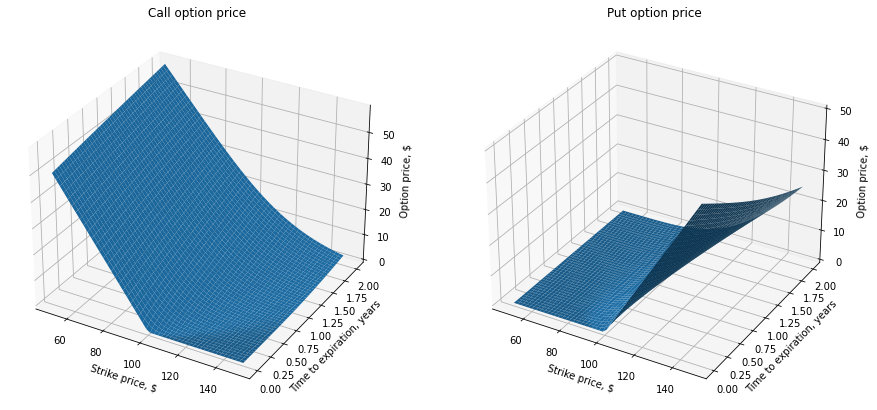

In [248]:
x, y = np.meshgrid(strikes, times)
call_price = price(calls, market_state)
put_price = price(puts, market_state)

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, call_price)
ax1.set_title('Call option price')
ax1.set_xlabel('Strike price, $')
ax1.set_ylabel('Time to expiration, years')
ax1.set_zlabel('Option price, $')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, put_price)
ax2.set_title('Put option price')
ax2.set_xlabel('Strike price, $')
ax2.set_ylabel('Time to expiration, years')
ax2.set_zlabel('Option price, $')

plt.show()

In [249]:
def plot_all(type_: str = 'Call',
             time_to_expiration: float = 0.25,
             volatility: float = 0.1587,
             stock_price: float = 100.0,
             interest_rate: float = 0.0):
    opt = StockOption(strike_price=np.linspace(20, 200, 100),
                      expiration_time=time_to_expiration,
                      is_call=(type_ == 'Call'))
    state = MarketState(stock_price=stock_price,
                        volatility=volatility,
                        interest_rate=interest_rate,
                        eval_time=0.0)
    
    data = {
        'price': price(opt, state),
        'delta': delta(opt, state),
        'gamma': gamma(opt, state),
        'vega': vega(opt, state),
        'theta': theta(opt, state),
        'rho': rho(opt, state)
    }

    fig, axs = plt.subplots(2, 3, figsize=(20, 10))

    for name, ax in zip(data, axs.flatten()):
        ax.plot(opt.strike_price, data[name])
        ax.set_title(name)
        ax.set_xlabel('Strike price')
        
    plt.show()

In [297]:
interact(plot_all,
         type_=widgets.Dropdown(options=['Call', 'Put'], value='Call', description='Option type'),
         time_to_expiration=widgets.FloatSlider(min=0.01, max=5.0, step=0.01, value=0.25, description='Time to expiration, years'),
         volatility=widgets.FloatSlider(min=0.1, max=2.0, step=0.01, value=0.1587, description='Volatility, annualized'),
         stock_price=widgets.FloatSlider(min=50.0, max=150.0, value=100.0, description='Stock price'),
         interest_rate=widgets.FloatSlider(min=0, max=0.2, step=0.005, value=0.0, description='Interest rate, annualized'));

interactive(children=(Dropdown(description='Option type', options=('Call', 'Put'), value='Call'), FloatSlider(…

## Episode 2: Monte-Carlo Strikes Back

Write down SDE for risk-neutral price process in Black-Scholes model and its solution <span style="color:blue">(5 points)</span>:

$$
\begin{cases}
d S_t = \\
S_{t_0} = 
\end{cases} \\
S_t = 
$$

Implement Monte-Carlo option pricing <span style="color:blue">(15 points)</span>

In [251]:
# Your code

def simulate_price(time: Union[float, np.ndarray],
                   n_simulations: int,
                   state: MarketState) -> np.ndarray:
    """Simulates price process evaluating it at given time points
        
    Args:
        time (float or np.darray): time point(s) at which the price shoud be evaluated.
        n_simulations (int): number of simulations.
        state (MarketState): initial market stateto start from.
        
    Returns:
        np.ndarray: numpy array of shape (n_simulations, *np.shape(time)) with price.
    """
    
    raise NotImplementedError
    
    
def present_value(time: Union[float, np.ndarray],
                  value: Union[float, np.ndarray],
                  interest_rate: float,
                  eval_time: float) -> Union[float, np.ndarray]:
    """Calculates present value of payoff(s) occuread at given time(s)
    
    Args:
        time (float or np.ndarray): time(s) in years at which payoff occured
        value (float or np.ndarray): value(s) of the payoff(s)
        interest_rate (float): continuous annualized constant discount rate
        eval_time (float): now, in years
    
    Returns:
        float or np.ndarray: continuously discounted value to time eval_time
    """
    
    raise NotImplementedError

In [252]:
%run -i mc_funcs.py

In [253]:
def mc_price(option: StockOption, state: MarketState, n_simulations: int = 10_000) -> Union[float, np.ndarray]:
    price = simulate_price(option.expiration_time, n_simulations, state)
    
    shape = option.strike_price.shape
    if option.is_call:
        payoff = np.maximum(0, price - np.reshape(option.strike_price, (1, *shape)))
    else:
        payoff = np.maximum(0, np.reshape(option.strike_price, (1, *shape)) - price)
        
    return present_value(time=option.expiration_time,
                         value=payoff.mean(0),
                         interest_rate=state.interest_rate,
                         eval_time=state.eval_time)

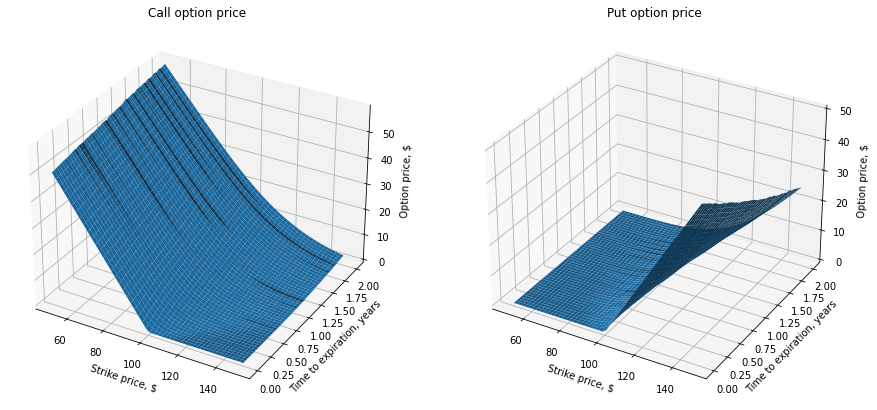

In [280]:
N_SIMULATIONS = 10_000
np.random.seed(42)

x, y = np.meshgrid(strikes, times)
call_price = mc_price(calls, market_state, N_SIMULATIONS)
put_price = mc_price(puts, market_state, N_SIMULATIONS)

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, call_price)
ax1.set_title('Call option price')
ax1.set_xlabel('Strike price, $')
ax1.set_ylabel('Time to expiration, years')
ax1.set_zlabel('Option price, $')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, put_price)
ax2.set_title('Put option price')
ax2.set_xlabel('Strike price, $')
ax2.set_ylabel('Time to expiration, years')
ax2.set_zlabel('Option price, $')

plt.show()

### Error Estimation

It is not sufficient to perform MC simulation, errors should also be estimated.
To obtain price confidence intervals Chebyshev's inequality can be used.
Let $\xi$ be the random variable, and we want to compute it's expectation using MC.
Let $\mu = \mathbb{E} [\xi]$ and $\sigma = \mathrm{var}[\xi]$.
Consider $N$ i.i.d. copies of $\xi$. 
Then:
$$
\mathbb{P} \left( \left\lvert \frac{\xi_1 + \ldots \xi_N}N - \mu \right\rvert \ge \epsilon \right) \le \frac{\sigma^2}{N\epsilon^2}
$$

In practice we usually don't know the variance of $\xi$ and need to estimate it using sample variance.
But in BSM there exits analytical formula for European options payoffs' variances. 
Derive the variances of the call and put opions' final payoff and the variances of their price (note the discounting):

$$
\mathrm{var}[C] = \\
\mathrm{var}[P] = 
$$

Plot error bars for 10000 MC simulations for 11 strikes from 50 to 150 for 0.95 confidence intervals

In [281]:
# your code

## Episode 3: The Phantom Implied Volatility

In [481]:
def calc_iv(option: CallStockOption, state: MarketState, option_price: float):
    vol = 0.2
    s = deepcopy(state)
    
    for _ in range(100):
        vol -= (price(option, s) - option_price) / (vega(option, s) + np.finfo(np.float64).eps)
        s.volatility = vol
    
    return vol